In [1]:
# data
import pandas as pd 
import numpy as np
import sys
from sys import path
import os

# visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# User defined functions / modules
from marketing_functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print("Importing Librarires and Setup complete.")

Importing Librarires and Setup complete.


In [2]:
# Seaborn options

sns.set(style="darkgrid")
sns.set_color_codes("muted")

# I. LOAD THE DATASET

In [15]:
# - rename the columns to snake case
# - rename the target column from "revenue" to "purchased"
data_path = "https://raw.githubusercontent.com/donadviser/datasets/master/data-don/online_shoppers_intention.csv"
data = pd.read_csv(data_path)
df = (data
      .pipe(rename_columns_to_snake_case)
      .rename(columns={'revenue': 'purchase'})
      # .columns  # List column names
      # .value_counts(dropna=False)  # Count unique values in each column, including NaN
      # .nunique()  # Count unique values in each column (excluding NaN)
      # .isnull().sum()  # Check for missing values in each column
      # .duplicated().sum()  # Check for duplicate rows
      # .drop_duplicates()
      # .info()
      # .describe(include='object') #.describe(include='object')
      # .purchased.value_counts() # Counts the unique values of the target column
      # .select_dtypes(include=['object']).head()  # Explore categorical columns
      # .sample(10)
      # .head()
      # .reset_index(drop=True)
     )
df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,purchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# II. EXPLORATORY DATA ANALYSIS (EDA)

## II.1 UNIVARIATE ANALYSIS

### TARGET COLUMN

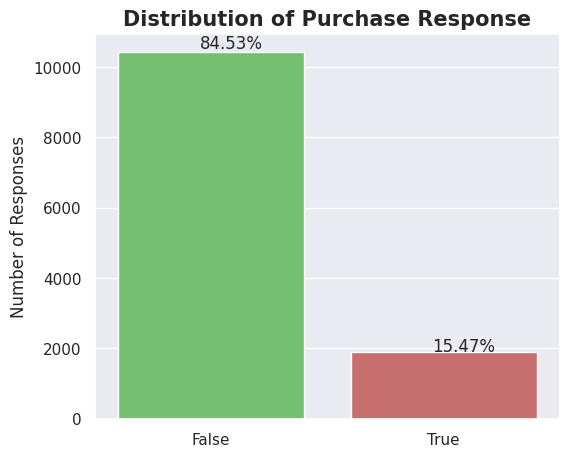

In [4]:
temp = df["purchased"].value_counts()
df_temp = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                      })

plt.figure(figsize=(6, 5))
x = ['False', 'True']  # Translated labels
ax = sns.barplot(x=x, y="values", data=df_temp, palette=['g', 'r'])

for p in ax.patches:
   percentage = '{:.2f}%'.format(100 * p.get_height() / len(df.purchased))
   x = p.get_x() + p.get_width() / 2 - 0.05
   y = p.get_y() + p.get_height() * 1.01
   ax.annotate(percentage, (x, y), fontsize=12)

plt.ylabel("Number of Responses")  # Translated label
plt.title("Distribution of Purchase Response", fontsize=15, fontweight='bold')  # Translated title
plt.show()

### FEATURES

In [5]:
df.info()
df.columns
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12330 non-null  int64  
 1   administrative_duration   12330 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    12330 non-null  float64
 4   product_related           12330 non-null  int64  
 5   product_related_duration  12330 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   special_day               12330 non-null  float64
 10  month                     12330 non-null  object 
 11  operating_systems         12330 non-null  int64  
 12  browser                   12330 non-null  int64  
 13  region                    12330 non-null  int64  
 14  traffi

administrative                27
administrative_duration     3335
informational                 17
informational_duration      1258
product_related              311
product_related_duration    9551
bounce_rates                1872
exit_rates                  4777
page_values                 2704
special_day                    6
month                         10
operating_systems              8
browser                       13
region                         9
traffic_type                  20
visitor_type                   3
weekend                        2
purchased                      2
dtype: int64

In [6]:
var_num = ['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'product_related',
       'bounce_rates', 'exit_rates', 'page_values','operating_systems']

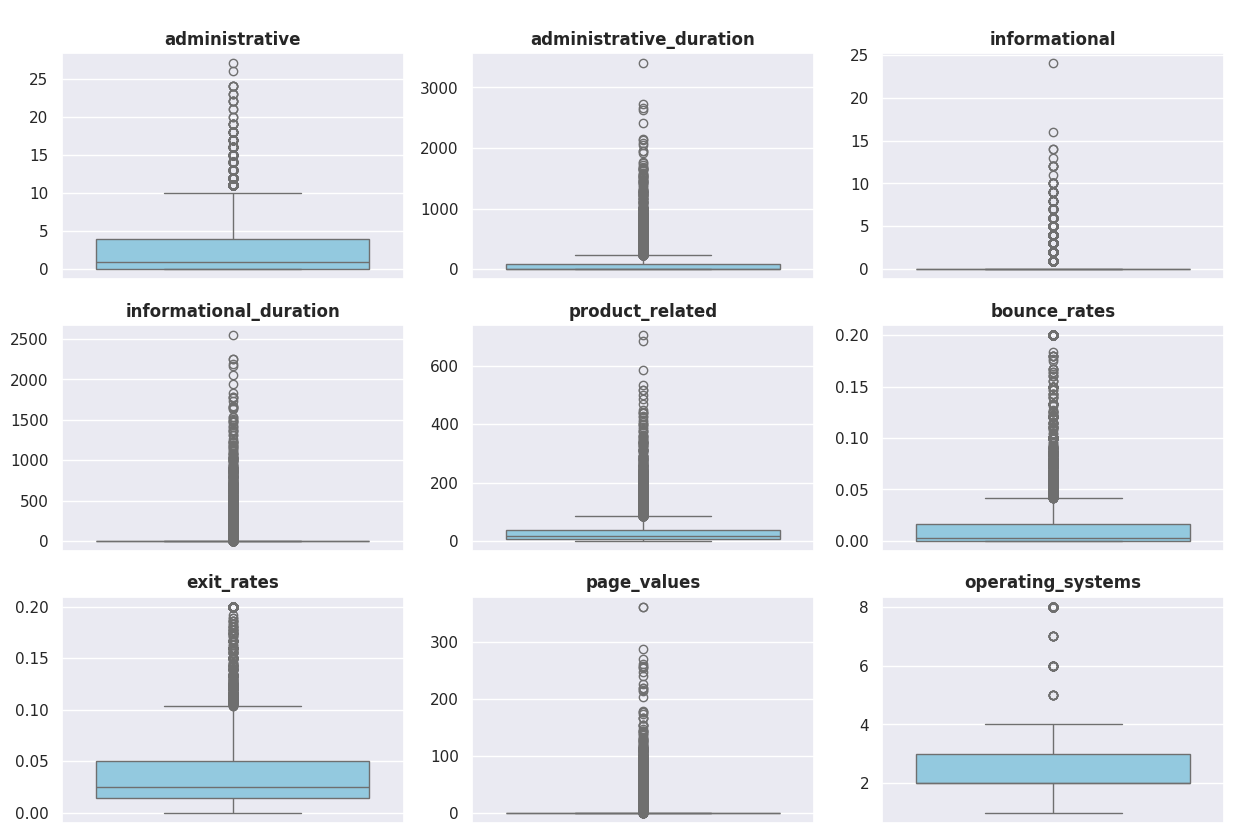

In [7]:
plt.figure(figsize=(15, 10))

for i in enumerate(var_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=df[i[1]],color='skyblue')
    plt.title('\n' + i[1], fontweight='bold')
    plt.ylabel("")

### II.2 BIVARIATE ANALYSIS

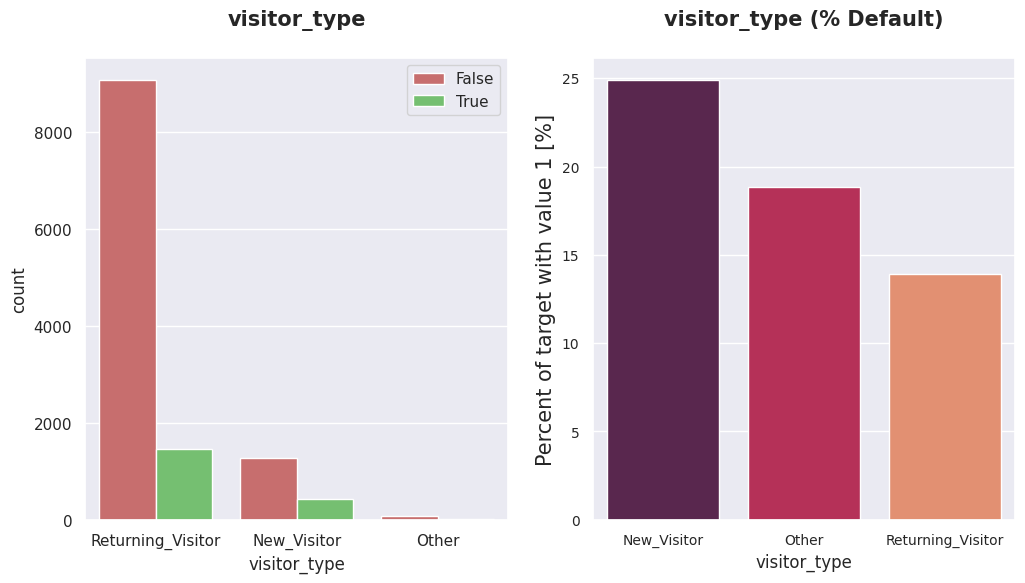

,visitor_type,Number of Count
0,Returning_Visitor,10551
1,New_Visitor,1694
2,Other,85


(None, None)

In [8]:
plot_stats('visitor_type', 'purchased', df)

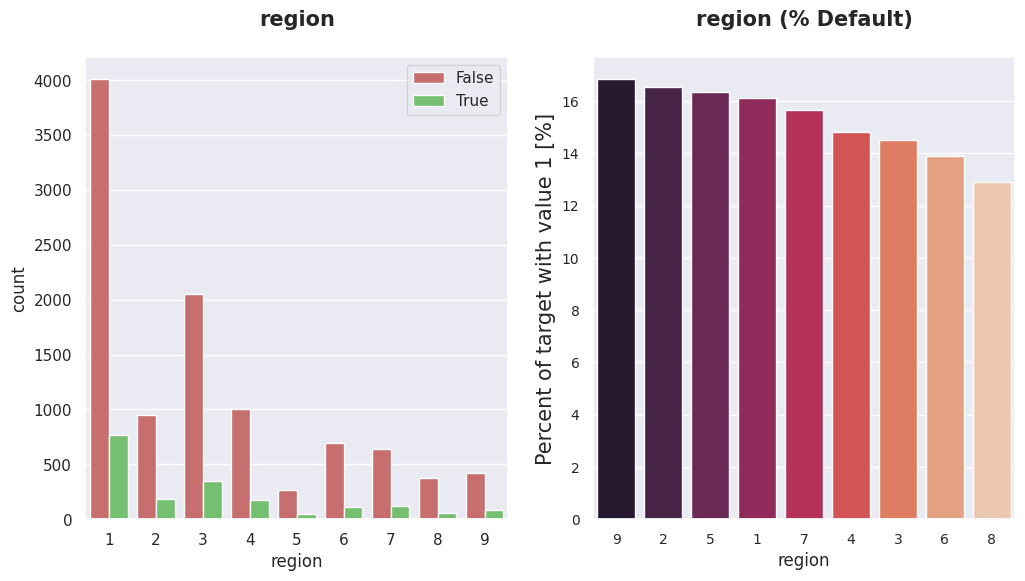

,region,Number of Count
0,1,4780
1,3,2403
2,4,1182
3,2,1136
4,6,805
5,7,761
6,9,511
7,8,434
8,5,318


(None, None)

In [9]:
plot_stats('region', 'purchased', df)

### II.3 MULTIVARIATE ANALYSIS

**CORRELATION MATRIX**

In [12]:
corr_df = df[var_num].corr()

In [13]:
corr_df

,administrative,administrative_duration,informational,informational_duration,product_related,bounce_rates,exit_rates,page_values,operating_systems
administrative,1.000000,0.601583,0.376850,0.255848,0.431119,-0.223563,-0.316483,0.098990,-0.006347
administrative_duration,0.601583,1.000000,0.302710,0.238031,0.289087,-0.144170,-0.205798,0.067608,-0.007343
informational,0.376850,0.302710,1.000000,0.618955,0.374164,-0.116114,-0.163666,0.048632,-0.009527
informational_duration,0.255848,0.238031,0.618955,1.000000,0.280046,-0.074067,-0.105276,0.030861,-0.009579
product_related,0.431119,0.289087,0.374164,0.280046,1.000000,-0.204578,-0.292526,0.056282,0.004290
bounce_rates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,1.000000,0.913004,-0.119386,0.023823
exit_rates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,0.913004,1.000000,-0.174498,0.014567
page_values,0.098990,0.067608,0.048632,0.030861,0.056282,-0.119386,-0.174498,1.000000,0.018508
operating_systems,-0.006347,-0.007343,-0.009527,-0.009579,0.004290,0.023823,0.014567,0.018508,1.000000


# III SAVE CLEAN DATASET

In [16]:
df.to_csv("market_response_cleaned.csv", index=False)